# COMS21202: Symbols, Patterns and Signals #
# Lab 3: Least Square Method #

---
Tip: You will need to refer to the help pages to complete most of these examples.
Tip: There is slight difference between `np.array` and `np.matrix` especially when it comes to operations on those. If you're not sure what type is given object try `print( type(x) )`.

To start with, run the code cell below to import  needed libraries.

In [109]:
import numpy as np
from scipy import stats
from skimage import data, io, color, transform, exposure
from pprint import pprint
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
from __future__ import print_function

%matplotlib inline
# notebook
import matplotlib.pylab as pylab
pylab.rcParams['figure.figsize'] = (32.0, 24.0)
pylab.rcParams['font.size'] = 24

## 1.  Get some numbers ##
**a) **Generate a sequence of 10 numbers ${y_i}$, $1\leq i\leq 10$, using the following equation
$$
y_i=0.2+0.5x_i+e_i
$$
where $x_i$ is a *uniformly distributed* random number between 0 and 1 and $e_i$ is a *random* number from $N(0,0.1)$ indicating a normally-distributed error in the measurement.

In [110]:
mu, sigma = 0, 0.1

xs = np.random.rand(100)
e = np.sqrt(sigma) * np.random.randn(100) + mu
y = 0.2 + 0.5*xs + e

**b) **Generate a scatter plot of $x_i, y_i$.

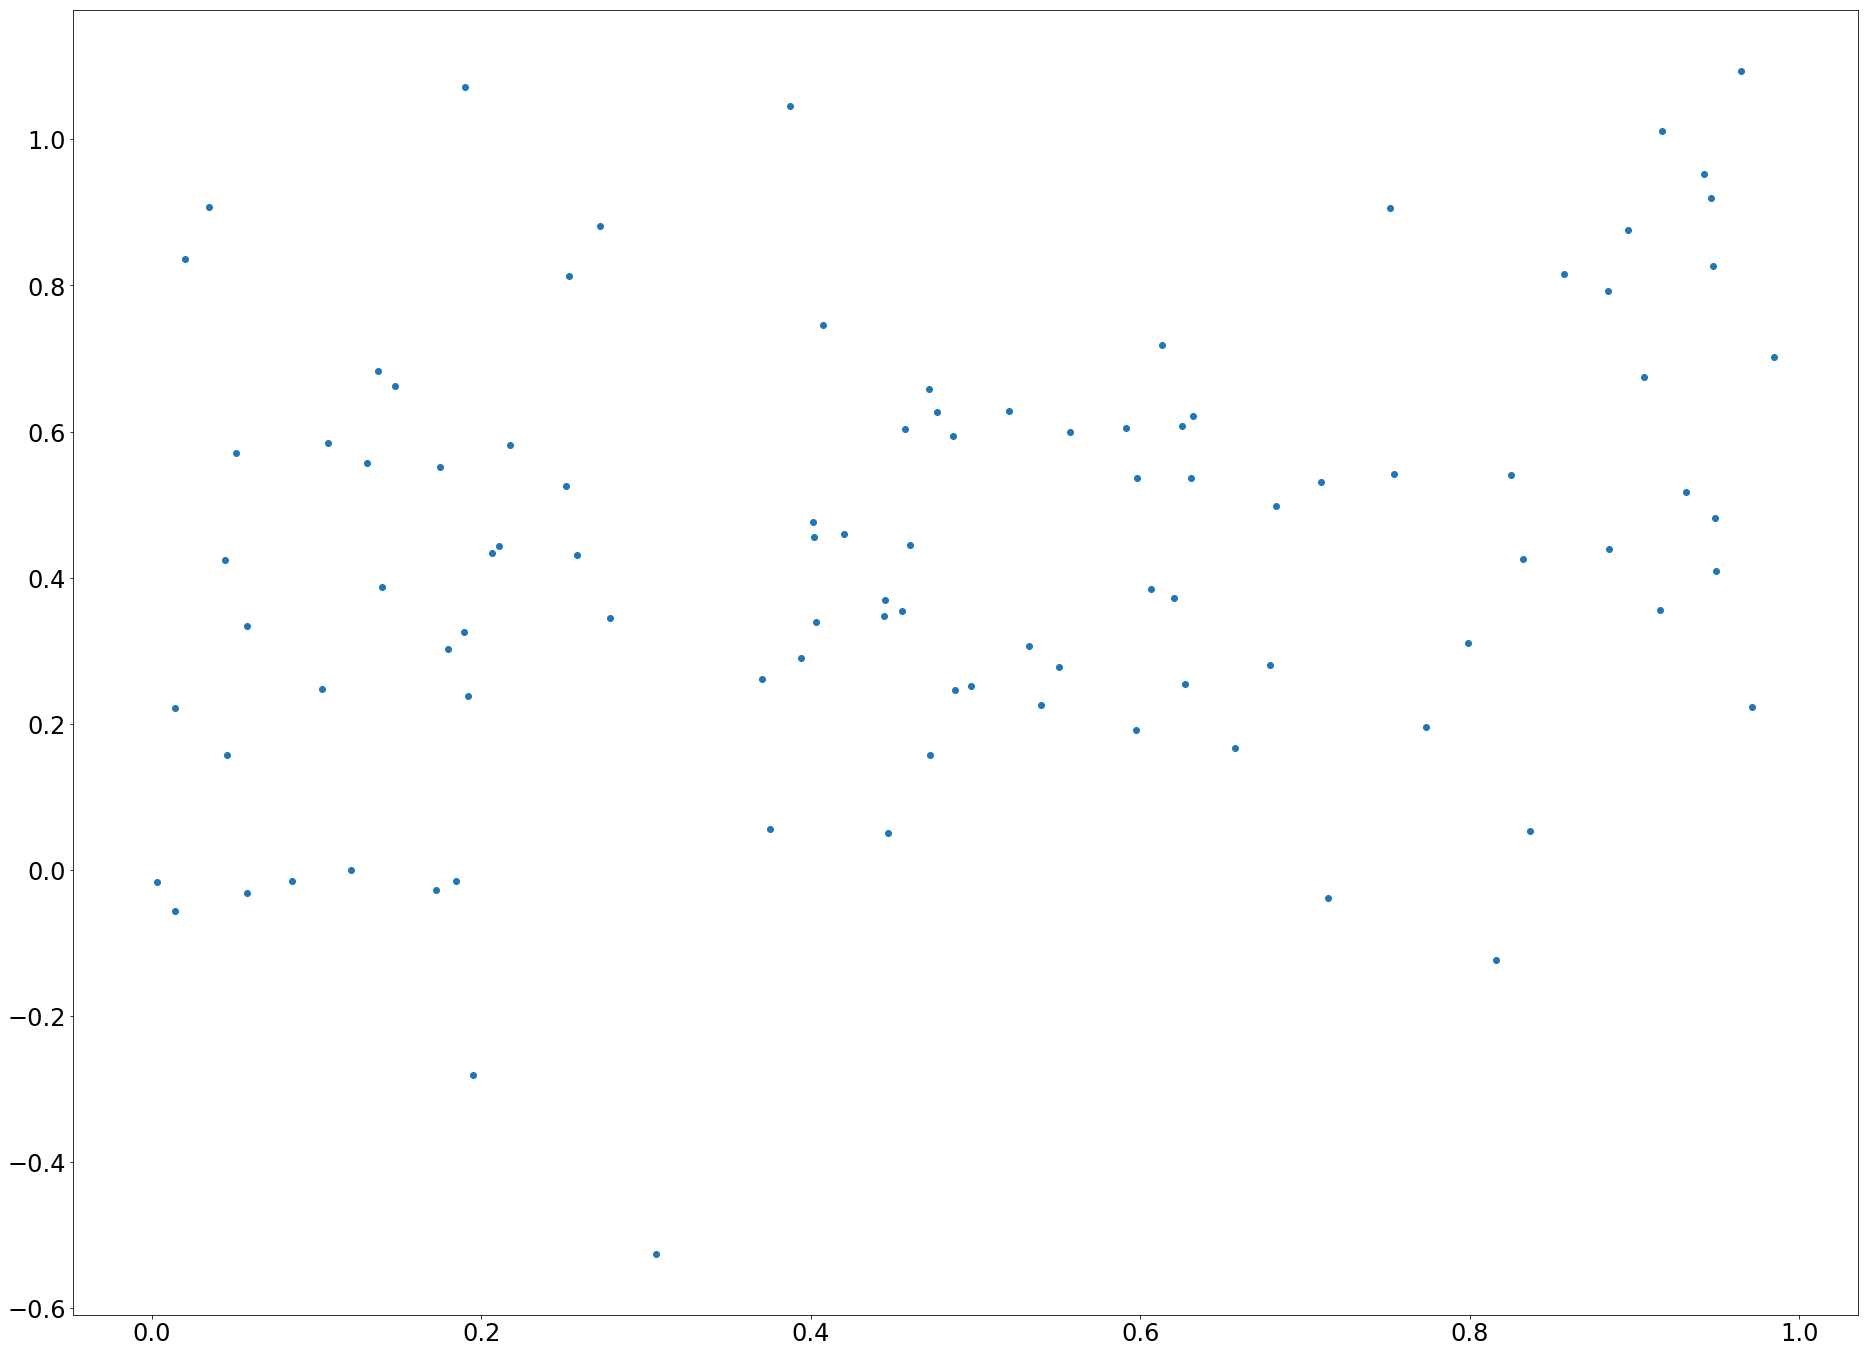

In [111]:
fig = plt.figure()
ax = fig.add_subplot(111)
ax.scatter(xs,y)

## 2. Create a general function ##
Change the above code to a function that receives the parameters $m$, $c$ and $n$ for the equation $y_i = c + m x_i + e_i$ and returns $n$ samples as shown in the previous exercise.  
Use the code to generate a 100 samples from the equation above and scatter plot the new sample.

In [112]:
def generate(c,m,n):
    mu2, sigma2 = 0, 0.1

    xs2 = np.random.rand(n)
    e2 = np.sqrt(sigma2) * np.random.randn(n) + mu2
    y2 = c + m*xs2 + e2
    
    return (xs2,y2)

xss, yss = generate(0.2,0.5,1000)





## 3. Least squares - Matrix Form ##
Using the sequences ${y_i}$ and ${x_i}$ from **Q2**, implement the matrix form of the method of least squares to determine estimates of the parameters $a$ and $b$ assuming that $y_i=a+bx_i+e_i$.

In [113]:
x_matrix = np.vstack([np.ones(len(xss)), xss]).T
a,b = np.linalg.lstsq(x_matrix,yss)[0]

print(a,b)

0.213022603292 0.512381277958


### Discuss: ### 
<font color="blue">what is the effect of changing the mean and the standard deviation of ei on the
estimated values of m and c
</font>

## 4. Line fitting ##

Draw the line defined by the estimated values of $a$ and $b$ on top of the scatter plot generated in **Q2**. Note: do not use any pre-defined functions. Write your own code to plot the line.

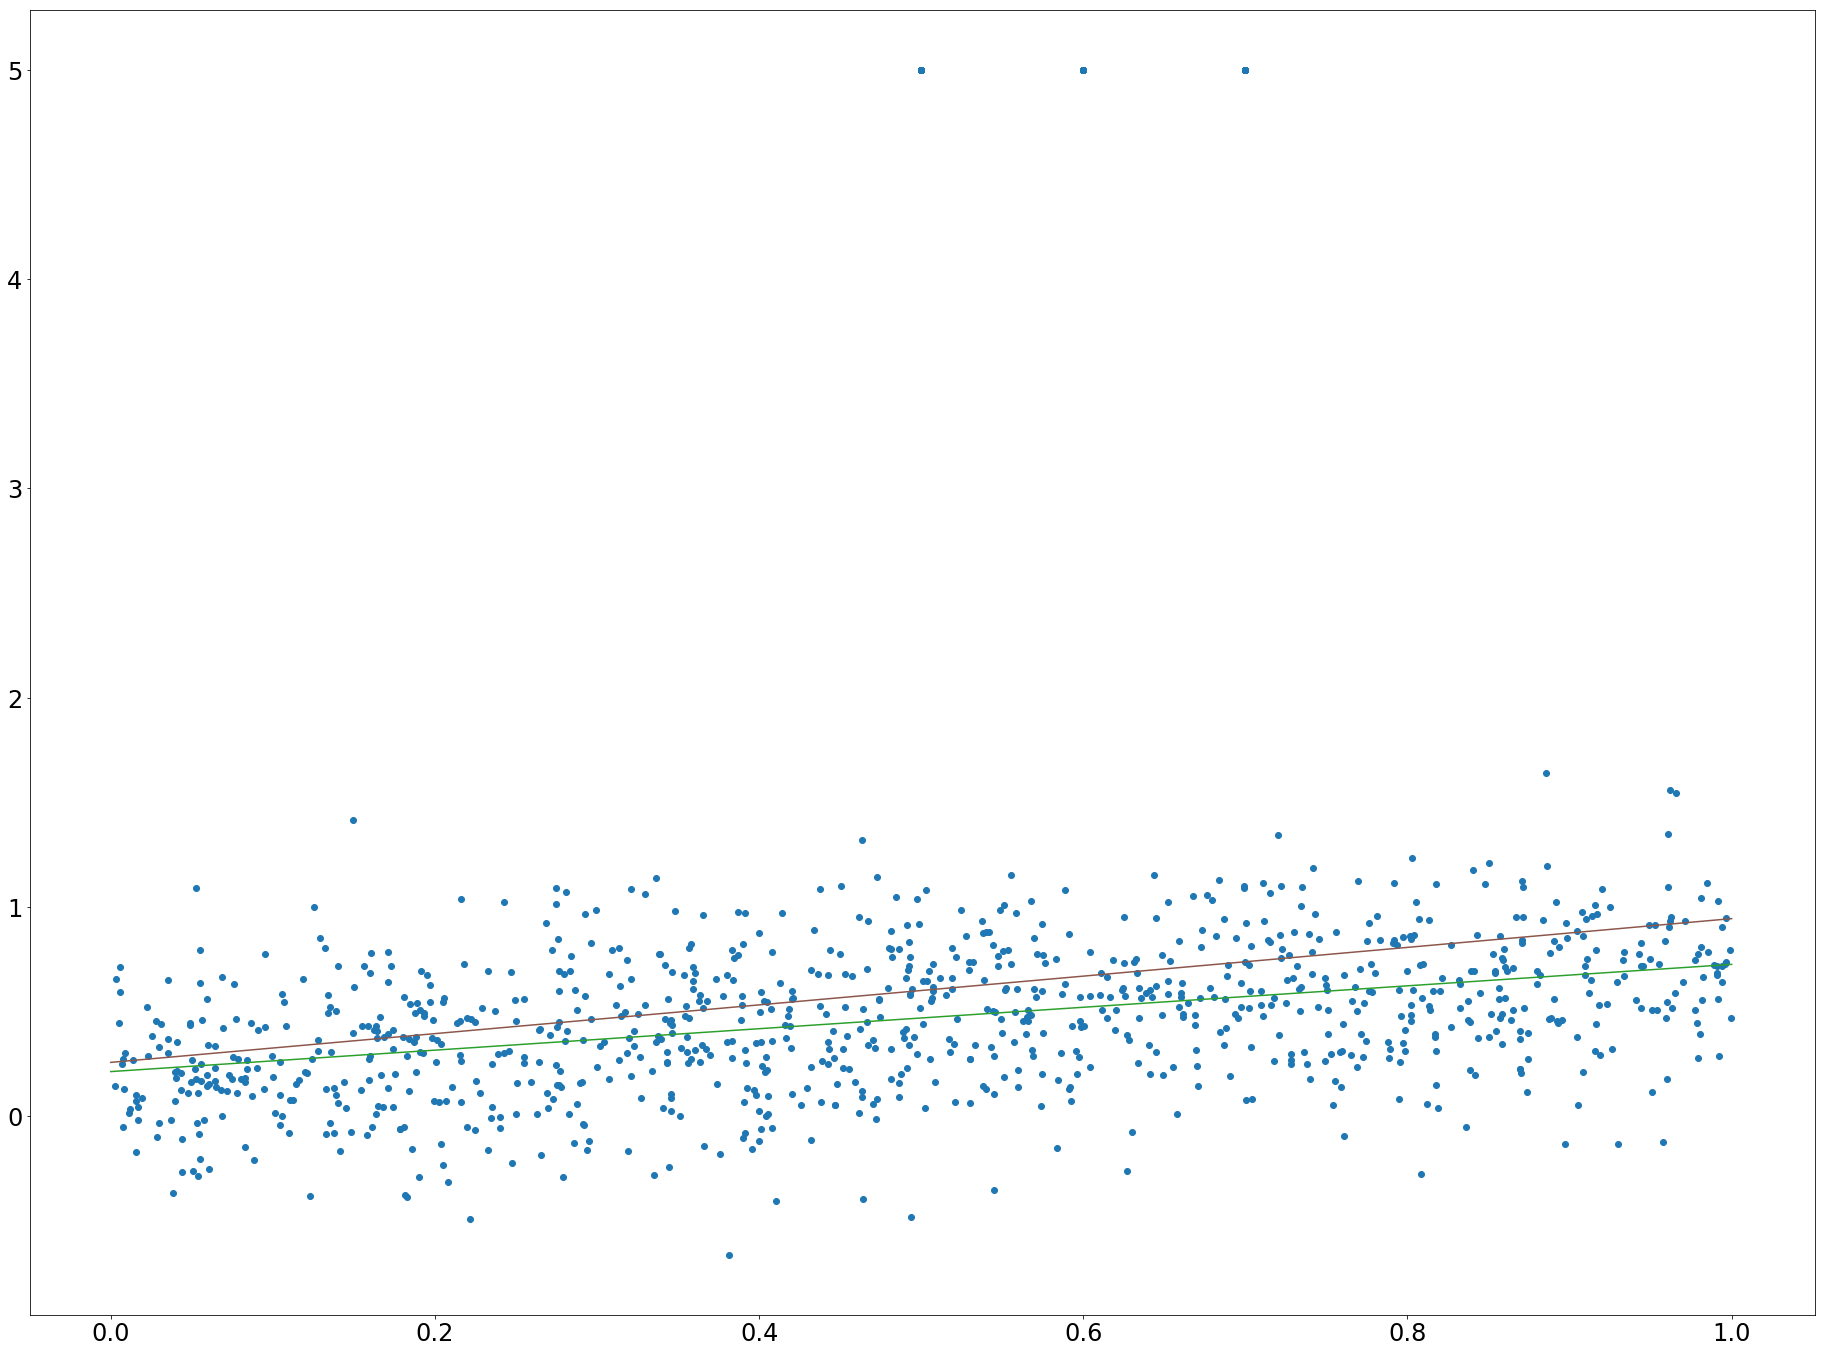

In [125]:
fig2 = plt.figure()
ax = fig2.add_subplot(111)
ax.scatter(xss,yss)

x = np.array([0,1])
y = a + b*x

ax.plot(x,y,color = 'C2')

xss = np.append(xss, [0.5,0.6,0.7])
x1_matrix = np.vstack([np.ones(len(xss)), xss]).T
yss = np.append(yss, [5,5,5])
a1,b1 = np.linalg.lstsq(x1_matrix,yss)[0]
y1 = a1 + b1*x
ax.plot(x,y1,color = 'C5')




## 5. Outliers ##
Add a few outliers to your data. For example, add the points {(0.5, 5), (0.6, 5), (0.7, 5)} to the sampled sequences from Q2.

Re-estimate the best line that fits the data after the addition of the outliers.

Plot the best fit line before and after the outlier data, in a way similar to the figure below (including the colouring and the legend).

![Line fit](lineFit.jpg)

### Discuss ###

<font color="blue">what is the effect of outliers on the best line estimate?</font>

## 6. Choosing your Model ##

### 6.1. Loading your data ###

Load the data in the file DMD.csv where the first column is $x_i$ and the second column is $y_i$.

Generate a scatter plot of $(x_i, y_i)$.

2.59410635712 -1.00601722344 -1.94348557289


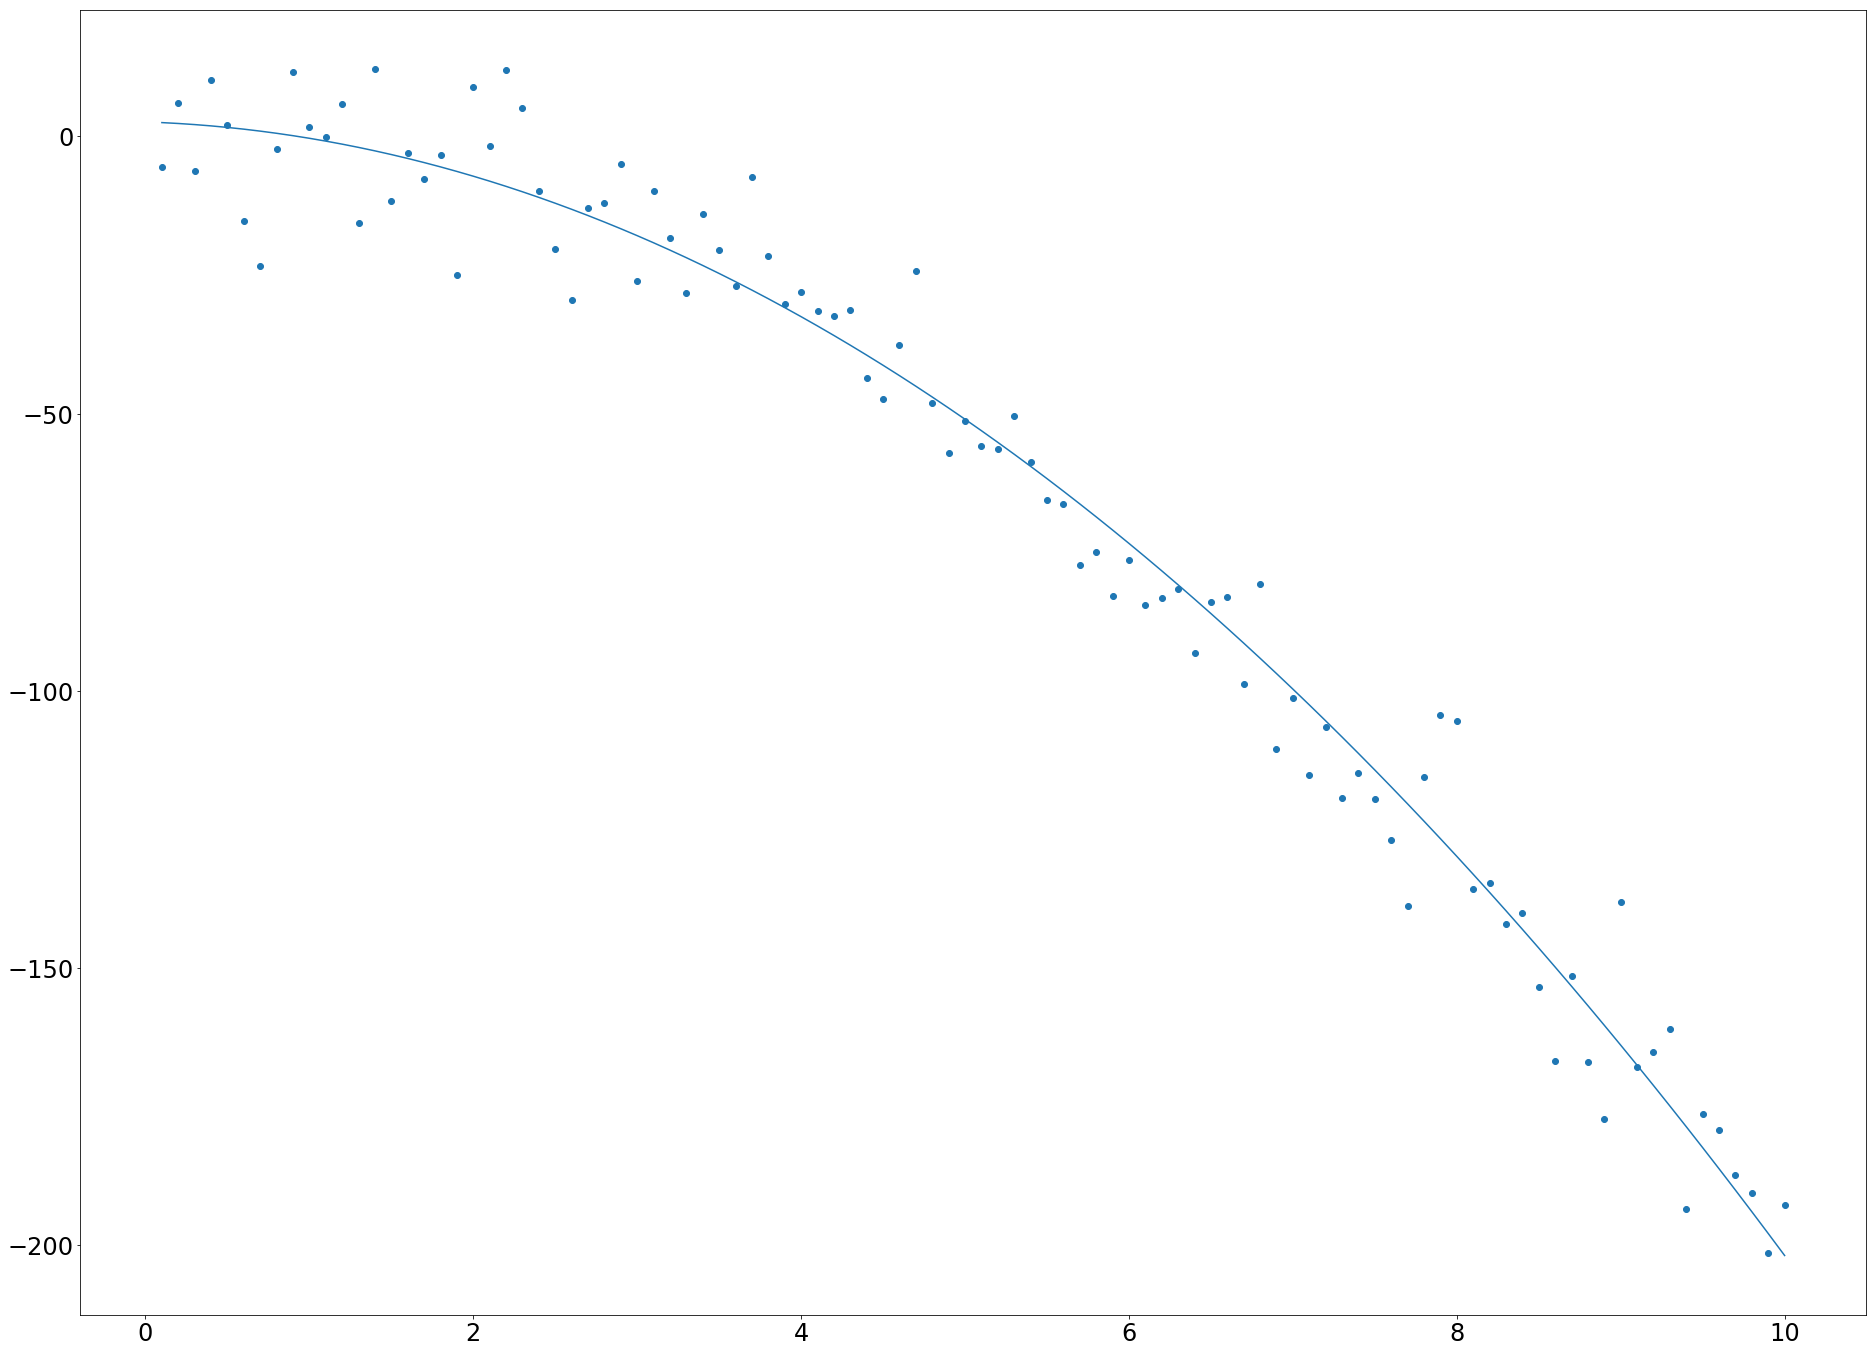

In [159]:
A = np.loadtxt("DMD.csv", delimiter=',')
x = A[:,0]
y = A[:,1]

fig3 = plt.figure()
ax1 = fig3.add_subplot(111)
ax1.scatter(x,y)

x2_matrix = np.vstack([np.ones(len(x)), x, np.square(x)]).T
a2,b2, c2 = np.linalg.lstsq(x2_matrix,y)[0]
print(a2,b2,c2)
sortedx = np.sort(x)
y = (c2 * np.square(sortedx)) + (b2*sortedx) + a2

ax1.plot(sortedx,y)


### 6.2. Deciding on the Model's Complexity ###

Assuming a polynomial relationship between $x_i$ and $y_i$, what would you suggest as a suitable complexity for the model? Write your model’s equation.

A quadratic formula y = ax^2 + bx + c in which a < 0 could be used to discribe the model.

### Discuss ###

<font color="blue">for the model you’ve chosen, what are the parameters of the model?</font>

### 6.2. Calculating the Model's Parameters ###

Adjust the code in Q3 if needed to calculate the parameters of your chosen model for this data.

### Discuss ###
<font color="blue">what would X and y in the least squares solution be?</font>

Plot your best fitting polynomail from Q8.

### 6.3. Generalisation and Overfitting ###

What would the model be if you generalise it further?

What would the model be if you attempt to overfit the training data?

### Discuss ###

<font color="blue">write down your answers for Q10 and Q11 and discuss your written explanation
with a TA</font>